21064051-Nguyễn Hùng Anh

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**E1**

In [ ]:
import cv2

# Đọc và hiển thị ảnh
img = cv2.imread('/content/drive/MyDrive/XuLyAnh/example.jpg')
cv2.namedWindow('Image Window', cv2.WINDOW_NORMAL)  # Tạo cửa sổ có thể thay đổi kích thước
cv2.imshow('Image Window', img)

# Chờ người dùng nhấn phím
key = cv2.waitKey(0)  # Chờ vô thời hạn

if key == 27:  # ESC key
    print("ESC pressed. Exiting.")
    cv2.destroyWindow('Image Window')  # Đóng một cửa sổ cụ thể
else:
    print(f"Key {key} pressed. Closing all windows.")
    cv2.destroyAllWindows()  # Đóng tất cả cửa sổ


**E2**

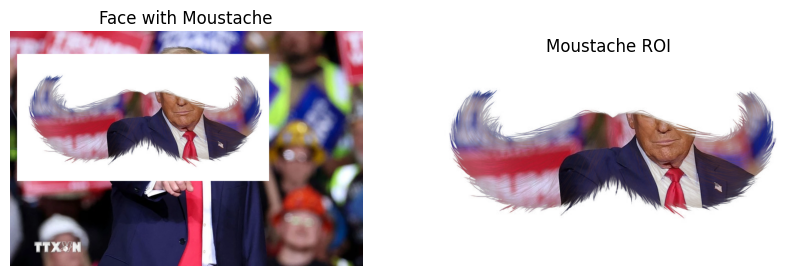

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Đọc ảnh gốc và ảnh có kênh alpha
face_image = cv2.imread('/content/drive/MyDrive/XuLyAnh/trump.jpg')  # Ảnh chính
moustache = cv2.imread('/content/drive/MyDrive/XuLyAnh/Moustache.png', -1)  # Ảnh có kênh alpha (-1 để đọc cả kênh alpha)

# Lấy kích thước ảnh moustache
h, w, _ = moustache.shape

# Assuming moustache has only 3 channels (BGR)
moustache_bgr = moustache[:, :, :3]  # Kênh màu (BGR)
moustache_alpha = moustache[:, :, 2]  # Kênh alpha (độ trong suốt)

# Xác định vùng ROI (Region of Interest) trên ảnh mặt
roi = face_image[65:65 + h, 20:20 + w]

# Tạo mặt nạ cho vùng môi-mũi từ kênh alpha
moustache_mask = cv2.merge((moustache_alpha, moustache_alpha, moustache_alpha)) / 255.0

# Sử dụng mặt nạ alpha để hòa trộn hình ảnh
roi_with_moustache = roi * (1 - moustache_mask) + moustache_bgr * moustache_mask
face_image[65:65 + h, 20:20 + w] = roi_with_moustache.astype(np.uint8)

# Hiển thị kết quả
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(face_image, cv2.COLOR_BGR2RGB))
plt.title("Face with Moustache")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(roi_with_moustache.astype(np.uint8), cv2.COLOR_BGR2RGB))
plt.title("Moustache ROI")
plt.axis('off')

plt.show()


**E3**

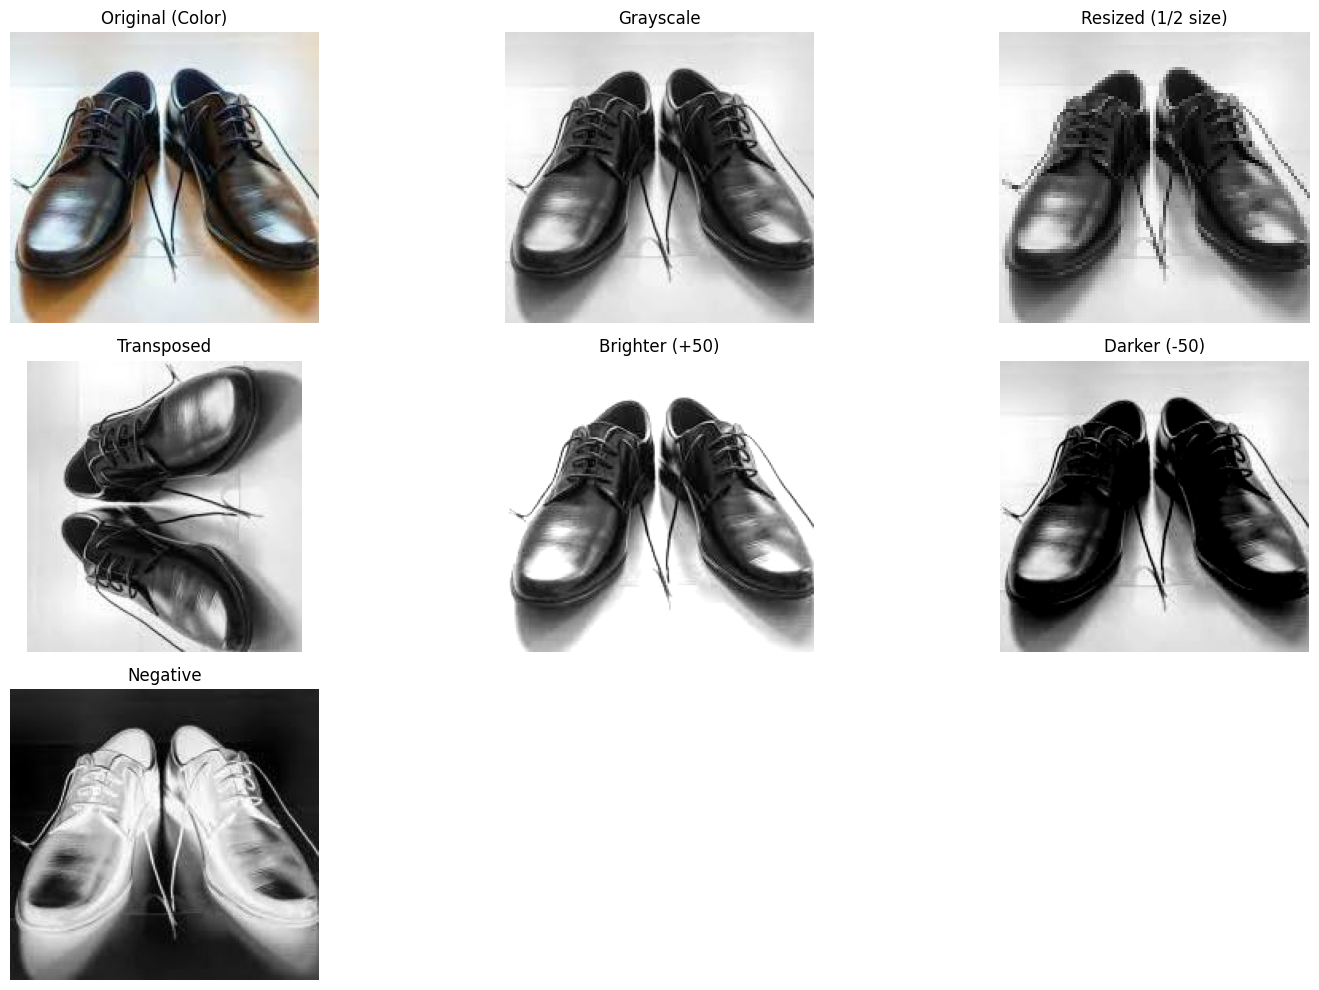

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 1. Đọc ảnh màu "shoes.jpg"
bgr_img = cv2.imread('/content/drive/MyDrive/XuLyAnh/shoes.jpg')

# 2. Chuyển ảnh sang ảnh xám
gray_img = cv2.cvtColor(bgr_img, cv2.COLOR_BGR2GRAY)

# 3. Resize ảnh xám (giảm kích thước còn 1/2 theo cả chiều ngang và dọc)
resized_img = cv2.resize(gray_img, (gray_img.shape[1] // 2, gray_img.shape[0] // 2))

# 4. Chuyển vị ma trận (transpose)
transposed_img = cv2.transpose(gray_img)

# 5. Tăng và giảm độ sáng (thêm/bớt 50 giá trị cường độ)
brighter_img = cv2.add(gray_img, 50)  # Tăng độ sáng
darker_img = cv2.subtract(gray_img, 50)  # Giảm độ sáng

# 6. Tạo ảnh âm bản (negative)
negative_img = cv2.bitwise_not(gray_img)

# 7. Lưu ảnh âm bản với chất lượng JPEG 80
cv2.imwrite('output.jpg', negative_img, [cv2.IMWRITE_JPEG_QUALITY, 80])

# Hiển thị tất cả các ảnh
plt.figure(figsize=(15, 10))

# Gốc
plt.subplot(3, 3, 1)
plt.imshow(cv2.cvtColor(bgr_img, cv2.COLOR_BGR2RGB))
plt.title("Original (Color)")
plt.axis('off')

# Xám
plt.subplot(3, 3, 2)
plt.imshow(gray_img, cmap='gray')
plt.title("Grayscale")
plt.axis('off')

# Resized
plt.subplot(3, 3, 3)
plt.imshow(resized_img, cmap='gray')
plt.title("Resized (1/2 size)")
plt.axis('off')

# Transposed
plt.subplot(3, 3, 4)
plt.imshow(transposed_img, cmap='gray')
plt.title("Transposed")
plt.axis('off')

# Brighter
plt.subplot(3, 3, 5)
plt.imshow(brighter_img, cmap='gray')
plt.title("Brighter (+50)")
plt.axis('off')

# Darker
plt.subplot(3, 3, 6)
plt.imshow(darker_img, cmap='gray')
plt.title("Darker (-50)")
plt.axis('off')

# Negative
plt.subplot(3, 3, 7)
plt.imshow(negative_img, cmap='gray')
plt.title("Negative")
plt.axis('off')

plt.tight_layout()
plt.show()


**E4**

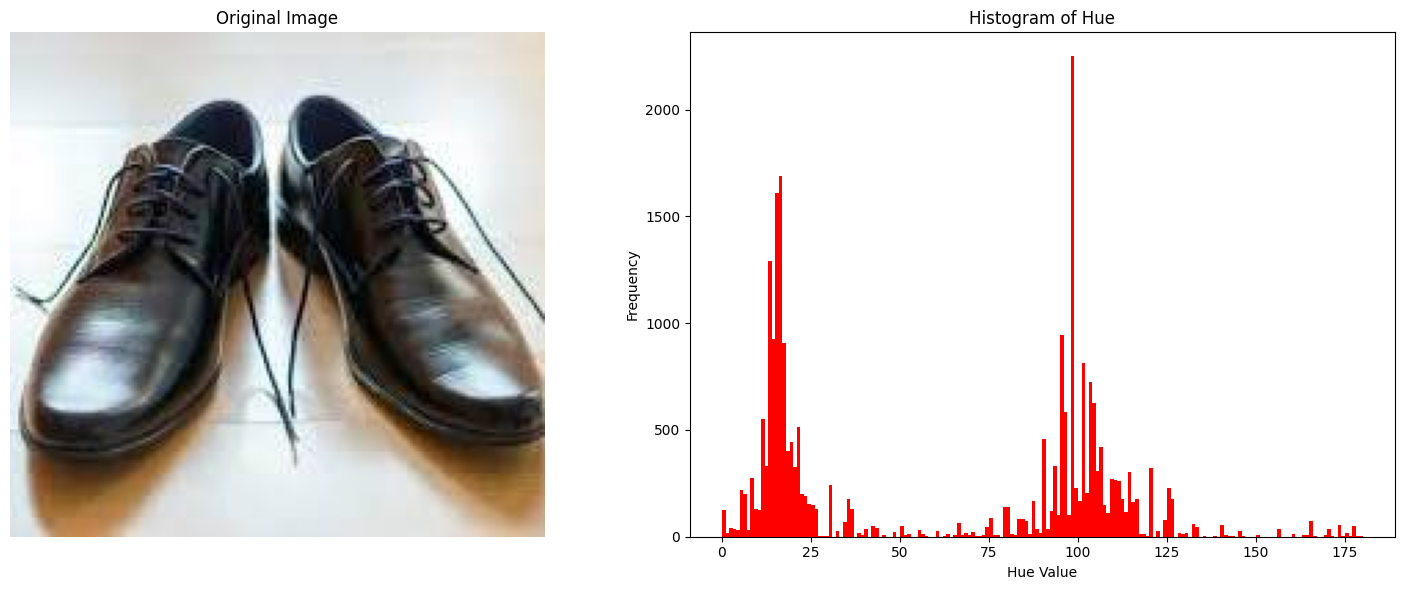

Dominant Hue: 98


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 1. Đọc ảnh màu "shoes.jpg"
bgr_image = cv2.imread('/content/drive/MyDrive/XuLyAnh/shoes.jpg')

# 2. Chuyển đổi ảnh sang không gian màu HSV
hsv_image = cv2.cvtColor(bgr_image, cv2.COLOR_BGR2HSV)

# 3. Tách các kênh H, S, V
H, S, V = cv2.split(hsv_image)

# 4. Lọc các pixel có giá trị Saturation thấp (loại bỏ nền trắng/gray)
H_filtered = H[S > 10]  # Chỉ giữ pixel có giá trị S lớn hơn 10
H_array = H_filtered.flatten()  # Chuyển thành mảng 1D

# 5. Tạo histogram cho kênh Hue
plt.figure(figsize=(15, 6))

# Hiển thị ảnh gốc
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(bgr_image, cv2.COLOR_BGR2RGB))
plt.title("Original Image")
plt.axis('off')

# Histogram của kênh Hue
plt.subplot(1, 2, 2)
plt.hist(H_array, bins=180, color='red', range=[0, 180])
plt.title("Histogram of Hue")
plt.xlabel("Hue Value")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

# 6. Xác định màu chiếm ưu thế
dominant_hue = np.argmax(np.histogram(H_array, bins=180, range=[0, 180])[0])
print(f"Dominant Hue: {dominant_hue}")


**E5**

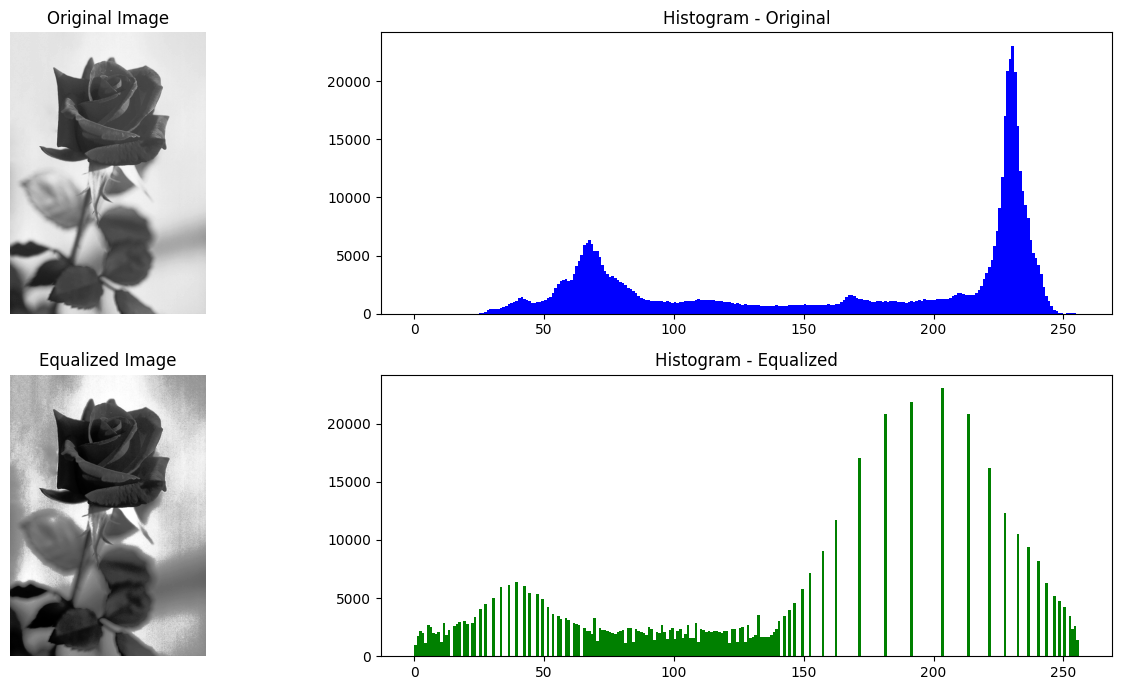

In [6]:
import cv2
import matplotlib.pyplot as plt

# 1. Đọc ảnh "rose.jpg" dưới dạng grayscale
gray_image = cv2.imread('/content/drive/MyDrive/XuLyAnh/rose.jpg', cv2.IMREAD_GRAYSCALE)

# 2. Áp dụng cân bằng histogram
equalized_image = cv2.equalizeHist(gray_image)

# 3. Hiển thị ảnh trước và sau cân bằng
plt.figure(figsize=(14, 7))

# Ảnh gốc
plt.subplot(2, 2, 1)
plt.imshow(gray_image, cmap='gray', vmin=0, vmax=255)
plt.title("Original Image")
plt.axis('off')

# Histogram ảnh gốc
plt.subplot(2, 2, 2)
plt.hist(gray_image.ravel(), bins=256, range=(0, 256), color='blue')
plt.title("Histogram - Original")

# Ảnh sau cân bằng
plt.subplot(2, 2, 3)
plt.imshow(equalized_image, cmap='gray', vmin=0, vmax=255)
plt.title("Equalized Image")
plt.axis('off')

# Histogram ảnh sau cân bằng
plt.subplot(2, 2, 4)
plt.hist(equalized_image.ravel(), bins=256, range=(0, 256), color='green')
plt.title("Histogram - Equalized")

plt.tight_layout()
plt.show()


**E6**

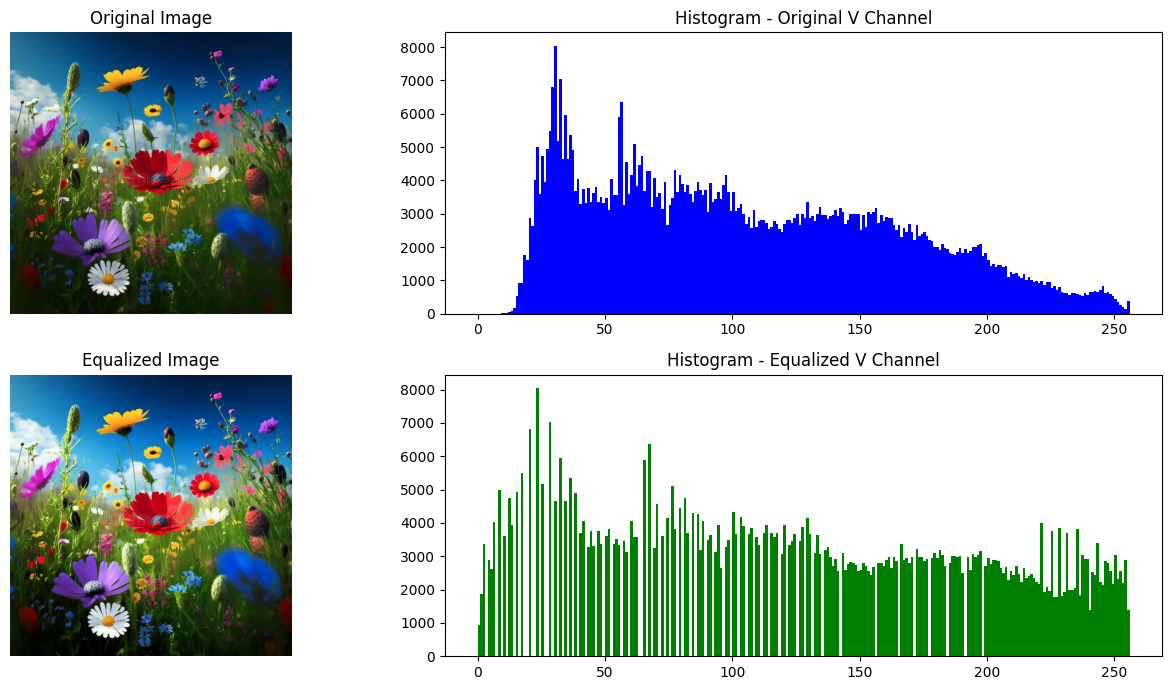

In [7]:
import cv2
import matplotlib.pyplot as plt

# 1. Đọc ảnh "flowers.jpg"
bgr_image = cv2.imread('/content/drive/MyDrive/XuLyAnh/flowers.jpg')

# 2. Chuyển đổi sang không gian HSV
hsv_image = cv2.cvtColor(bgr_image, cv2.COLOR_BGR2HSV)

# 3. Tách các kênh HSV
H, S, V = cv2.split(hsv_image)

# 4. Cân bằng histogram cho kênh V
equalized_V = cv2.equalizeHist(V)

# 5. Kết hợp lại kênh HSV sau khi cân bằng kênh V
equalized_hsv = cv2.merge([H, S, equalized_V])

# 6. Chuyển đổi lại sang không gian BGR
equalized_bgr = cv2.cvtColor(equalized_hsv, cv2.COLOR_HSV2BGR)

# 7. Hiển thị ảnh gốc và ảnh sau cân bằng
plt.figure(figsize=(14, 7))

# Ảnh gốc
plt.subplot(2, 2, 1)
plt.imshow(cv2.cvtColor(bgr_image, cv2.COLOR_BGR2RGB))
plt.title("Original Image")
plt.axis('off')

# Histogram kênh V gốc
plt.subplot(2, 2, 2)
plt.hist(V.ravel(), bins=256, range=(0, 256), color='blue')
plt.title("Histogram - Original V Channel")

# Ảnh sau cân bằng
plt.subplot(2, 2, 3)
plt.imshow(cv2.cvtColor(equalized_bgr, cv2.COLOR_BGR2RGB))
plt.title("Equalized Image")
plt.axis('off')

# Histogram kênh V sau cân bằng
plt.subplot(2, 2, 4)
plt.hist(equalized_V.ravel(), bins=256, range=(0, 256), color='green')
plt.title("Histogram - Equalized V Channel")

plt.tight_layout()
plt.show()


**E7**

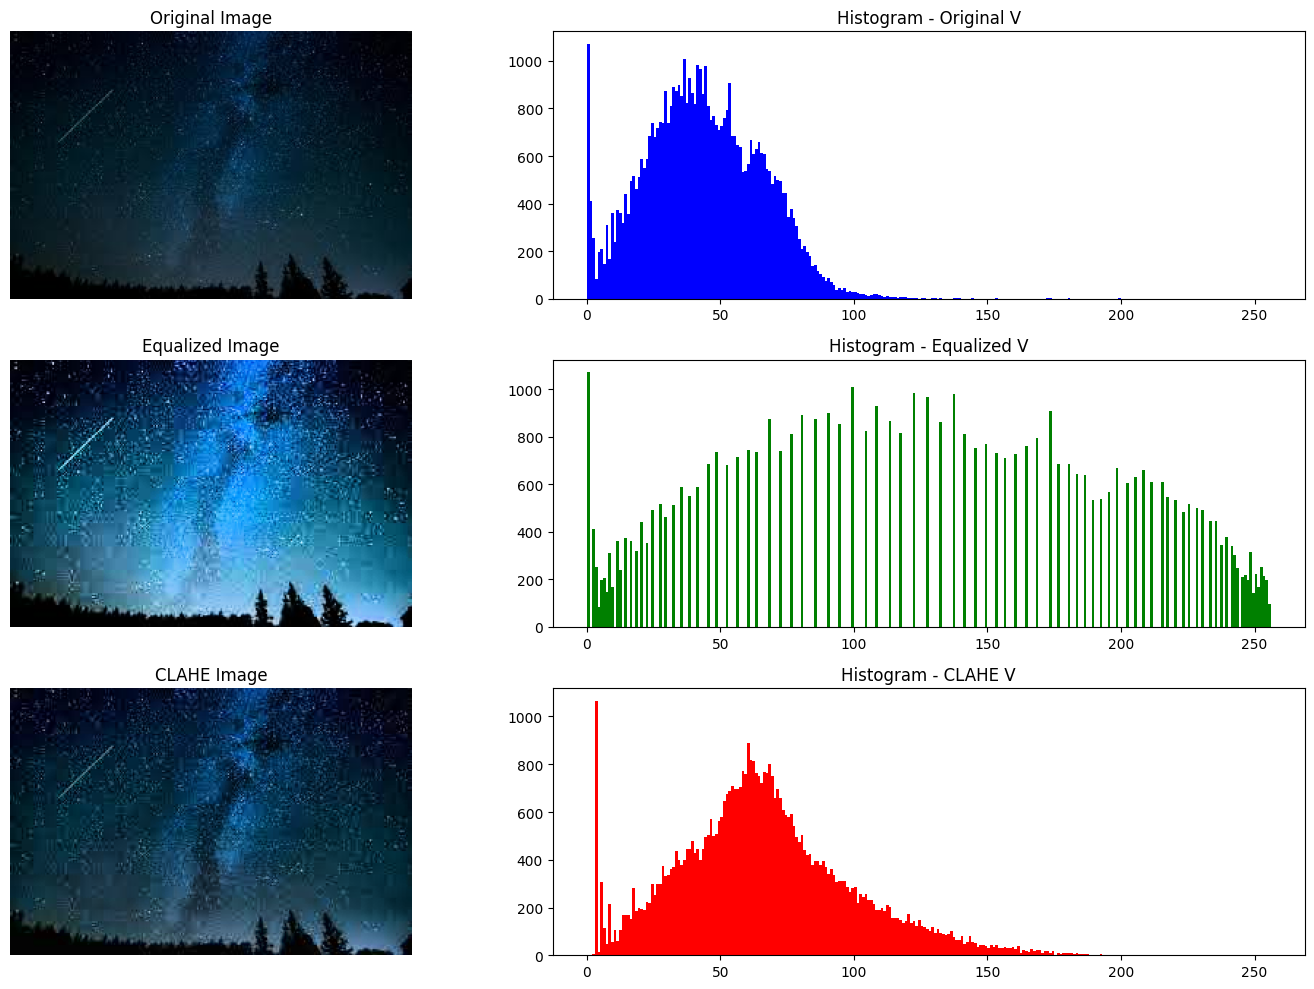

In [10]:
import cv2
import matplotlib.pyplot as plt

# 1. Đọc ảnh "night_sky.jpg"
bgr_image = cv2.imread('/content/drive/MyDrive/XuLyAnh/night_sky.jpg')

# 2. Chuyển đổi sang không gian HSV
hsv_image = cv2.cvtColor(bgr_image, cv2.COLOR_BGR2HSV)

# 3. Tách các kênh HSV
H, S, V = cv2.split(hsv_image)

# 4. Tạo đối tượng CLAHE
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))

# 5. Áp dụng CLAHE cho kênh V
clahe_V = clahe.apply(V)

# 6. Cân bằng histogram thường (để so sánh)
equalized_V = cv2.equalizeHist(V)

# 7. Kết hợp các kênh HSV
hsv_clahe = cv2.merge([H, S, clahe_V])
hsv_equalized = cv2.merge([H, S, equalized_V])

# 8. Chuyển về không gian BGR
bgr_clahe = cv2.cvtColor(hsv_clahe, cv2.COLOR_HSV2BGR)
bgr_equalized = cv2.cvtColor(hsv_equalized, cv2.COLOR_HSV2BGR)

# 9. Hiển thị kết quả
plt.figure(figsize=(15, 10))

# Ảnh gốc
plt.subplot(3, 2, 1)
plt.imshow(cv2.cvtColor(bgr_image, cv2.COLOR_BGR2RGB))
plt.title("Original Image")
plt.axis('off')

# Histogram kênh V gốc
plt.subplot(3, 2, 2)
plt.hist(V.ravel(), bins=256, range=(0, 256), color='blue')
plt.title("Histogram - Original V")

# Cân bằng thường
plt.subplot(3, 2, 3)
plt.imshow(cv2.cvtColor(bgr_equalized, cv2.COLOR_BGR2RGB))
plt.title("Equalized Image")
plt.axis('off')

# Histogram cân bằng thường
plt.subplot(3, 2, 4)
plt.hist(equalized_V.ravel(), bins=256, range=(0, 256), color='green')
plt.title("Histogram - Equalized V")

# CLAHE
plt.subplot(3, 2, 5)
plt.imshow(cv2.cvtColor(bgr_clahe, cv2.COLOR_BGR2RGB))
plt.title("CLAHE Image")
plt.axis('off')

# Histogram CLAHE
plt.subplot(3, 2, 6)
plt.hist(clahe_V.ravel(), bins=256, range=(0, 256), color='red')
plt.title("Histogram - CLAHE V")

plt.tight_layout()
plt.show()


**E8**

PMF (Probability Mass Function):

PMF là hàm mô tả xác suất một biến ngẫu nhiên rời rạc nhận các giá trị cụ thể.
Ví dụ: Trong ảnh, PMF cho biết tần suất xuất hiện của mỗi giá trị cường độ pixel.
CDF (Cumulative Distribution Function):

CDF là hàm tích lũy, biểu diễn xác suất biến ngẫu nhiên có giá trị nhỏ hơn hoặc bằng một giá trị cụ thể.

Trong ảnh, CDF được dùng để chuẩn hóa độ sáng hoặc thực hiện cân bằng histogram.